In [46]:
# import required python libraries
#import geopandas as gpd  # for geo-data structure
import numpy as np  # for some operation better done with numpy
import matplotlib.pyplot as plt  # for creating plots
#import shapely.geometry  # for geometry data crunching
#from shapely.geometry import Point  # specifically for point geometry data manipulation
#import keplergl
#from keplergl import KeplerGl
import pandas as pd
crs = {'init': 'epsg:4326'}
#from shapely.geometry import Point
import mpl_toolkits


In [149]:
RW_f = pd.read_csv('RW_FB_data_20210608.csv',low_memory=False,encoding='utf-8')

In [145]:
RW_e = pd.read_csv('Rwanda_Ericsson_07_06_2021.csv',low_memory=False,encoding='utf-8')

In [146]:
RW_e.head(100)

sn  SCHOOL_CODE    SCHOOL_NAME   school_category school_settings  \
0     1     430710.0      GS MURAMA            PUBLIC          12 YBE   
1     2     521312.0    GS MUHORORO            PUBLIC          12 YBE   
2     3     120515.0      GS MWENDO            PUBLIC          12 YBE   
3     4     120122.0   GS KIMISANGE            PUBLIC          12 YBE   
4     5     331220.0      GS MWENDO            PUBLIC          12 YBE   
..  ...          ...            ...               ...             ...   
95   96     451908.0      NYARURAMA            PUBLIC           12YBE   
96   97     452002.0     GS RWAMIKO            PUBLIC           12YBE   
97   98     270824.0  GS NYABISINDU  GOVERNMENT_AIDED           12YBE   
98   99     510602.0      GS KABARE  GOVERNMENT_AIDED           12YBE   
99  100     530903.0   GS Murambi I            PUBLIC           12YBE   

     district     sector        cell     village  LATITUDE  ...  \
0     RUTSIRO     MASASA      GABIRO      GABIRO -1.973667  ...   
1     KARONGI    MURAMBI    MUHORORO     BWAKIRA -2.159389  ...   
2     RUHANGO     MWENDO     GAFUNZO   NYAMIGINA -2.166806  ...   
3    KICUKIRO   KIGARAMA  BWERANKORI    NYENYERI -1.989889  ...   
4     GICUMBI       MUKO      MWENDO      KAGOGO -1.730639  ...   
..        ...        ...         ...         ...       ...  ...   
95    GICUMBI     RUVUNE   GASHIRIRA    RUGERERO -1.604470  ...   
96    GICUMBI    RWAMIKO    KIGABIRO   KARANGARA -1.758420  ...   
97    MUHANGA  NYAMABUYE    GITARAMA  NYABISINDU -2.069640  ...   
98  RWAMAGANA     MUHAZI      KABARE     UMUNINI -1.887970  ...   
99    GATSIBO    MURAMBI     MURAMBI   AGATAGARA -1.776500  ...   

    Best_2G_provider Best_3G_provider Best_4G_provider  Best_5G_provider  \
0               None              MTN             None              None   
1                MTN             None              MTN              None   
2                MTN             None             None              None   
3                MTN              MTN            Olleh              None   
4             Airtel             Tigo            Olleh              None   
..               ...              ...              ...               ...   
95              None             None             None              None   
96            Airtel             Tigo             Tigo              None   
97            Airtel           Airtel              MTN              None   
98               MTN           Airtel              MTN              None   
99               MTN              MTN             None              None   

    2G_coverage_present  3G_coverage_present 4G_coverage_present  \
0                   Yes                  Yes                  No   
1                   Yes                  Yes                 Yes   
2                   Yes                  Yes                 Yes   
3                   Yes                  Yes                 Yes   
4                   Yes                  Yes                 Yes   
..                  ...                  ...                 ...   
95                  Yes                  Yes                 Yes   
96                  Yes                  Yes                 Yes   
97                  Yes                  Yes                 Yes   
98                  Yes                  Yes                 Yes   
99                  Yes                  Yes                 Yes   

   5G_coverage_present Distance_to_nearest_tower Data_Source  
0                   No                        -1    Ericsson  
1                   No                        -1    Ericsson  
2                   No                        -1    Ericsson  
3                   No                        -1    Ericsson  
4                   No                        -1    Ericsson  
..                 ...                       ...         ...  
95                  No                        -1    Ericsson  
96                  No                        -1    Ericsson  
97                  No    

In [147]:
RW_e.isna().mean()*100

sn                            0.000000
SCHOOL_CODE                   0.023827
SCHOOL_NAME                   0.000000
school_category               0.000000
school_settings               0.000000
district                      0.000000
sector                        0.000000
cell                          0.000000
village                       0.047653
LATITUDE                      0.000000
LONGITUDE                     0.000000
electricity_availability      0.000000
internet_availability         0.000000
number_of_students            0.000000
number_of_teachers            0.000000
computers                    60.304980
uuid                          0.000000
connectivity_type             0.000000
giga_school_id                0.000000
Coverage                      0.000000
Coverage_type                 0.000000
2G_coverage                   0.000000
3G_coverage                   0.000000
4G_coverage                   0.000000
5G_coverage                   0.000000
2G_coverage_distance     

In [150]:
RW_f.head()

tile_bigint  clean_lat  clean_lon  school_id   sn  source_school_id  \
0  2.623980e+15  -2.103444  29.750667        112  112          270809.0   
1  2.621800e+15  -1.447220  29.576560        116  116          430706.0   
2  2.623740e+15  -2.364860  29.731250        258  258          210110.0   
3  2.628750e+15  -2.132806  30.132222        551  551          521402.0   
4  2.624030e+15  -2.069639  29.754806        901  901          540916.0   

     school_name   school_category school_settings  district  ...  \
0   GS KABGAYI A  GOVERNMENT_AIDED           12YBE   MUHANGA  ...   
1    GS KAMPANGA            PUBLIC           12YBE   MUSANZE  ...   
2     EP RWESERO            PUBLIC           12YBE    NYANZA  ...   
3      GS MURAMA            PUBLIC           9 YBE  BUGESERA  ...   
4  GS NYABISINDU            PUBLIC           12YBE   MUHANGA  ...   

  number_of_students number_of_teachers computers  \
0               1752                 42     630.0   
1               1872                 51     155.0   
2                921                 13     380.0   
3                900                 18     299.0   
4                763                 28     230.0   

                                   uuid giga_school_id  latitude  longitude  \
0  b750902a-9318-4894-bd8d-b30b66045370    G_RWA_00112 -2.103444  29.750667   
1  0a7866f4-ed52-4e3e-932a-186a83a68b8c    G_RWA_00116 -1.447220  29.576560   
2  f219fcd6-1d27-4765-99ab-f36458e90c4b    G_RWA_00258 -2.364860  29.731250   
3  5516e10e-a94d-4d82-9c09-008a1e47dfcc    G_RWA_00551 -2.132806  30.132222   
4  f56e9eed-895c-4aa1-956a-98729a1e8a90    G_RWA_00901 -2.069639  29.754806   

   percent_2g  percent_3g percent_4g  
0       28.32       64.54       7.14  
1       38.16       55.92       5.92  
2       31.19       58.26      10.55  
3       30.33       60.93       8.74  
4       31.21       60.07       8.72  

[5 rows x 26 columns]

In [151]:
RW_f.columns

Index(['tile_bigint', 'clean_lat', 'clean_lon', 'school_id', 'sn',
       'source_school_id', 'school_name', 'school_category', 'school_settings',
       'district', 'sector', 'cell', 'village', 'electricity_availability',
       'internet_availability', 'connectivity_type', 'number_of_students',
       'number_of_teachers', 'computers', 'uuid', 'giga_school_id', 'latitude',
       'longitude', 'percent_2g', 'percent_3g', 'percent_4g'],
      dtype='object')

<AxesSubplot:>

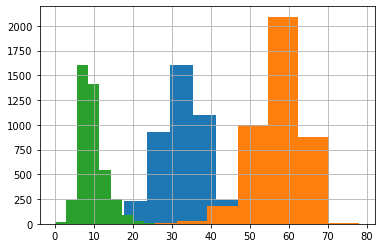

In [152]:
RW_f['percent_2g'].hist(bins=10)
RW_f['percent_3g'].hist(bins=10)
RW_f['percent_4g'].hist(bins=10)

In [153]:
RW_f.isna().mean()*100

tile_bigint                  0.000000
clean_lat                    0.000000
clean_lon                    0.000000
school_id                    0.000000
sn                           0.000000
source_school_id             0.023838
school_name                  0.000000
school_category              0.000000
school_settings              0.000000
district                     0.000000
sector                       0.000000
cell                         0.000000
village                      0.047676
electricity_availability     0.000000
internet_availability        0.000000
connectivity_type            0.000000
number_of_students           0.000000
number_of_teachers           0.000000
computers                   60.286055
uuid                         0.000000
giga_school_id               0.000000
latitude                     0.000000
longitude                    0.000000
percent_2g                   0.000000
percent_3g                   0.000000
percent_4g                   0.000000
dtype: float

In [154]:
RW_e['coverage'] = np.where((RW_e['2G_coverage']== 'None') & (RW_e['3G_coverage']== 'None')& (RW_e['4G_coverage']== 'None'), 'NO', 'YES')


In [155]:
RW_f['coverage'] = np.where((RW_f['percent_2g'].isnull()) & (RW_f['percent_3g'].isnull())& (RW_f['percent_4g'].isnull()), 'NO', 'YES')
RW_f['coverage'] = np.where((RW_f['percent_2g']<=0) & (RW_f['percent_3g']<=0) & (RW_f['percent_4g']<=0), 'NO', 'YES')

In [156]:
RW_f['coverage'].unique()

array(['YES', 'NO'], dtype=object)

In [157]:
RW_f['2G_coverage'] = np.where((RW_f['percent_2g'] > 0), 'YES', 'NO')
RW_f['3G_coverage'] = np.where((RW_f['percent_3g'] > 0), 'YES', 'NO')
RW_f['4G_coverage'] = np.where((RW_f['percent_4g'] > 0), 'YES', 'NO')

In [158]:
RW_e.columns

Index(['sn', 'SCHOOL_CODE', 'SCHOOL_NAME', 'school_category',
       'school_settings', 'district', 'sector', 'cell', 'village', 'LATITUDE',
       'LONGITUDE', 'electricity_availability', 'internet_availability',
       'number_of_students', 'number_of_teachers', 'computers', 'uuid',
       'connectivity_type', 'giga_school_id', 'Coverage', 'Coverage_type',
       '2G_coverage', '3G_coverage', '4G_coverage', '5G_coverage',
       '2G_coverage_distance', '3G_coverage_distance', '4G_coverage_distance',
       '5G_coverage_distance', 'Best_2G_provider', 'Best_3G_provider',
       'Best_4G_provider', 'Best_5G_provider', '2G_coverage_present',
       '3G_coverage_present', '4G_coverage_present', '5G_coverage_present',
       'Distance_to_nearest_tower', 'Data_Source', 'coverage'],
      dtype='object')

In [159]:
RW_e.rename(columns={'2G_coverage':'2G_coverage_quality', '3G_coverage':'3G_coverage_quality', '4G_coverage': '4G_coverage_quality'}, inplace=True)

In [160]:
RW_e['4G_coverage_quality'].unique()

array(['None', 'Excellent', 'Good', 'Poor', 'Fair'], dtype=object)

In [161]:
RW_e['2G_coverage'] = np.where((RW_e['2G_coverage_quality'] != 'None'), 'YES', 'NO')
RW_e['3G_coverage'] = np.where((RW_e['3G_coverage_quality'] != 'None'), 'YES', 'NO')
RW_e['4G_coverage'] = np.where((RW_e['4G_coverage_quality'] != 'None'), 'YES', 'NO')

In [162]:
RW_e.head()

sn  SCHOOL_CODE   SCHOOL_NAME school_category school_settings  district  \
0   1     430710.0     GS MURAMA          PUBLIC          12 YBE   RUTSIRO   
1   2     521312.0   GS MUHORORO          PUBLIC          12 YBE   KARONGI   
2   3     120515.0     GS MWENDO          PUBLIC          12 YBE   RUHANGO   
3   4     120122.0  GS KIMISANGE          PUBLIC          12 YBE  KICUKIRO   
4   5     331220.0     GS MWENDO          PUBLIC          12 YBE   GICUMBI   

     sector        cell    village  LATITUDE  ...  2G_coverage_present  \
0    MASASA      GABIRO     GABIRO -1.973667  ...                  Yes   
1   MURAMBI    MUHORORO    BWAKIRA -2.159389  ...                  Yes   
2    MWENDO     GAFUNZO  NYAMIGINA -2.166806  ...                  Yes   
3  KIGARAMA  BWERANKORI   NYENYERI -1.989889  ...                  Yes   
4      MUKO      MWENDO     KAGOGO -1.730639  ...                  Yes   

  3G_coverage_present 4G_coverage_present  5G_coverage_present  \
0                 Yes                  No                   No   
1                 Yes                 Yes                   No   
2                 Yes                 Yes                   No   
3                 Yes                 Yes                   No   
4                 Yes                 Yes                   No   

   Distance_to_nearest_tower  Data_Source coverage 2G_coverage 3G_coverage  \
0                         -1     Ericsson      YES          NO         YES   
1                         -1     Ericsson      YES         YES          NO   
2                         -1     Ericsson      YES         YES          NO   
3                         -1     Ericsson      YES         YES         YES   
4                         -1     Ericsson      YES         YES         YES   

  4G_coverage  
0          NO  
1         YES  
2          NO  
3         YES  
4         YES  

[5 rows x 43 columns]

In [163]:
def coverage_type(df):
    if df['4G_coverage'] == 'YES':
        return "4G"
    elif df['3G_coverage'] == 'YES':
        return "3G"
    elif df['2G_coverage'] == 'YES':
        return "2G"
    else:
        return "None"

In [164]:
RW_f['coverage_type'] = RW_f.apply((lambda x: coverage_type(x)),axis=1)

In [165]:
RW_e['coverage_type'] = RW_e.apply((lambda x: coverage_type(x)),axis=1)

In [166]:
RW_f['coverage_type'].unique()

array(['4G', '3G', 'None'], dtype=object)

In [167]:
RW_e[RW_e['coverage_type']=='None'].head()

sn  SCHOOL_CODE SCHOOL_NAME school_category school_settings district  \
6    7     430323.0  GS RWAMIKO          PUBLIC          12 YBE  RUTSIRO   
13  14     520343.0   GS BUREGA          PUBLIC          12 YBE  KARONGI   
35  36     421319.0   GS NYANGE          PUBLIC          12 YBE    NGOMA   
77  78     271011.0   NYAMIYAGA          PUBLIC           12YBE  MUHANGA   
79  80     550707.0  GS NYAWERA          PUBLIC           12YBE   KIREHE   

      sector        cell        village  LATITUDE  ...  3G_coverage_present  \
6   MANIHIRA      HANIRO  KAZIRAMIHUNDE -1.939389  ...                  Yes   
13    GITESI  NYAMIRINGA          CYIMA -2.159000  ...                  Yes   
35  MUGESERA      NYANGE         RUSAVE -2.112639  ...                  Yes   
77     RONGI     GASHARU      NYAMIYAGA -1.786810  ...                  Yes   
79    MPANGA       NASHO     NYAWERA II -2.087000  ...                  Yes   

   4G_coverage_present 5G_coverage_present  Distance_to_nearest_tower  \
6                  Yes                  No                         -1   
13                 Yes                  No                         -1   
35                 Yes                  No                         -1   
77                 Yes                  No                         -1   
79                  No                  No                         -1   

    Data_Source  coverage 2G_coverage 3G_coverage 4G_coverage coverage_type  
6      Ericsson        NO          NO          NO          NO          None  
13     Ericsson        NO          NO          NO          NO          None  
35     Ericsson        NO          NO          NO          NO          None  
77     Ericsson        NO          NO          NO          NO          None  
79     Ericsson        NO          NO          NO          NO          None  

[5 rows x 44 columns]

In [168]:
RW_e.rename(columns={'SCHOOL_CODE':'school_id', 'SCHOOL_NAME':'school_name'}, inplace=True)

In [169]:
features = ['giga_school_id','school_name','2G_coverage','3G_coverage','4G_coverage','coverage','coverage_type'] 

In [170]:
RW_fc = RW_f[features]

In [171]:
RW_ec = RW_e[features]

In [172]:
RW_fc.head()

giga_school_id    school_name 2G_coverage 3G_coverage 4G_coverage coverage  \
0    G_RWA_00112   GS KABGAYI A         YES         YES         YES      YES   
1    G_RWA_00116    GS KAMPANGA         YES         YES         YES      YES   
2    G_RWA_00258     EP RWESERO         YES         YES         YES      YES   
3    G_RWA_00551      GS MURAMA         YES         YES         YES      YES   
4    G_RWA_00901  GS NYABISINDU         YES         YES         YES      YES   

  coverage_type  
0            4G  
1            4G  
2            4G  
3            4G  
4            4G

In [173]:
RW_ec.head()

giga_school_id   school_name 2G_coverage 3G_coverage 4G_coverage coverage  \
0    G_RWA_00001     GS MURAMA          NO         YES          NO      YES   
1    G_RWA_00002   GS MUHORORO         YES          NO         YES      YES   
2    G_RWA_00003     GS MWENDO         YES          NO          NO      YES   
3    G_RWA_00004  GS KIMISANGE         YES         YES         YES      YES   
4    G_RWA_00005     GS MWENDO         YES         YES         YES      YES   

  coverage_type  
0            3G  
1            4G  
2            2G  
3            4G  
4            4G

In [32]:
#RW_c_sub.loc[RW_c_sub['coverage_type'].isin(['4G','3G', '2G']), 'coverage'] = 'YES'

In [33]:
#RW_c_sub.loc[RW_c_sub['coverage_type'].isin(['No']), 'coverage'] = 'NO'

In [34]:
#cov_val = ['4G','3G', '2G','No']

In [35]:
#RW_c_sub.loc[~RW_c_sub['coverage_type'].isin(cov_val), 'coverage'] = np.nan

In [36]:
#RW_c_sub.head()

In [37]:
# using compare function
#df1.compare(df2)

In [174]:
RW_fc = RW_fc[RW_fc['giga_school_id'].notna()]

In [175]:
RW_ec.isna().mean()*100

giga_school_id    0.0
school_name       0.0
2G_coverage       0.0
3G_coverage       0.0
4G_coverage       0.0
coverage          0.0
coverage_type     0.0
dtype: float64

In [177]:
RW_ec = RW_ec[RW_ec['giga_school_id'].notna()]

In [178]:
RW_fc.isna().mean()*100

giga_school_id    0.0
school_name       0.0
2G_coverage       0.0
3G_coverage       0.0
4G_coverage       0.0
coverage          0.0
coverage_type     0.0
dtype: float64

In [179]:
df_all = pd.concat([RW_fc.set_index('giga_school_id'), RW_ec.set_index('giga_school_id')], 
                   axis='columns', keys=['Facebook', 'Ericsson'])
df_all

Facebook                                               \
                  school_name 2G_coverage 3G_coverage 4G_coverage coverage   
giga_school_id                                                               
G_RWA_00112      GS KABGAYI A         YES         YES         YES      YES   
G_RWA_00116       GS KAMPANGA         YES         YES         YES      YES   
G_RWA_00258        EP RWESERO         YES         YES         YES      YES   
G_RWA_00551         GS MURAMA         YES         YES         YES      YES   
G_RWA_00901     GS NYABISINDU         YES         YES         YES      YES   
...                       ...         ...         ...         ...      ...   
G_RWA_02681       EP RWANZUKI         YES         YES         YES      YES   
G_RWA_03213            MURURU         YES         YES         YES      YES   
G_RWA_03523     EP NYAKIBUNGO         YES         YES         YES      YES   
G_RWA_02451               NaN         NaN         NaN         NaN      NaN   
G_RWA_02626               NaN         NaN         NaN         NaN      NaN   

                                                           Ericsson  \
               coverage_type                            school_name   
giga_school_id                                                        
G_RWA_00112               4G                           GS KABGAYI A   
G_RWA_00116               4G                            GS KAMPANGA   
G_RWA_00258               4G                             EP RWESERO   
G_RWA_00551               4G                              GS MURAMA   
G_RWA_00901               4G                          GS NYABISINDU   
...                      ...                                    ...   
G_RWA_02681               4G                            EP RWANZUKI   
G_RWA_03213               4G                                 MURURU   
G_RWA_03523               4G                          EP NYAKIBUNGO   
G_RWA_02451              NaN  GROUPE SCOLAIRE SAINT NICOLAS CYANIKA   
G_RWA_02626              NaN             Ecole Notre Dame des Anges   

                                                                           
               2G_coverage 3G_coverage 4G_coverage coverage coverage_type  
giga_school_id                                                             
G_RWA_00112            YES         YES         YES      YES            4G  
G_RWA_00116            YES         YES         YES      YES            4G  
G_RWA_00258            YES         YES         YES      YES            4G  
G_RWA_00551            YES         YES         YES      YES            4G  
G_RWA_00901            YES         YES         YES      YES            4G  
...                    ...         ...         ...      ...           ...  
G_RWA_02681            YES          NO          NO      YES            2G  
G_RWA_03213            YES         YES         YES      YES            4G  
G_RWA_03523            YES         YES         YES      YES            4G  
G_RWA_02451            YES         YES         YES      YES            4G  
G_RWA_02626            YES         YES         YES      YES            4G  

[4197 rows x 12 columns]

In [180]:
df_final = df_all.swaplevel(axis='columns')[RW_fc.columns[1:]]
df_final

school_name                                         \
                     Facebook                               Ericsson   
giga_school_id                                                         
G_RWA_00112      GS KABGAYI A                           GS KABGAYI A   
G_RWA_00116       GS KAMPANGA                            GS KAMPANGA   
G_RWA_00258        EP RWESERO                             EP RWESERO   
G_RWA_00551         GS MURAMA                              GS MURAMA   
G_RWA_00901     GS NYABISINDU                          GS NYABISINDU   
...                       ...                                    ...   
G_RWA_02681       EP RWANZUKI                            EP RWANZUKI   
G_RWA_03213            MURURU                                 MURURU   
G_RWA_03523     EP NYAKIBUNGO                          EP NYAKIBUNGO   
G_RWA_02451               NaN  GROUPE SCOLAIRE SAINT NICOLAS CYANIKA   
G_RWA_02626               NaN             Ecole Notre Dame des Anges   

               2G_coverage          3G_coverage          4G_coverage           \
                  Facebook Ericsson    Facebook Ericsson    Facebook Ericsson   
giga_school_id                                                                  
G_RWA_00112            YES      YES         YES      YES         YES      YES   
G_RWA_00116            YES      YES         YES      YES         YES      YES   
G_RWA_00258            YES      YES         YES      YES         YES      YES   
G_RWA_00551            YES      YES         YES      YES         YES      YES   
G_RWA_00901            YES      YES         YES      YES         YES      YES   
...                    ...      ...         ...      ...         ...      ...   
G_RWA_02681            YES      YES         YES       NO         YES       NO   
G_RWA_03213            YES      YES         YES      YES         YES      YES   
G_RWA_03523            YES      YES         YES      YES         YES      YES   
G_RWA_02451            NaN      YES         NaN      YES         NaN      YES   
G_RWA_02626            NaN      YES         NaN      YES         NaN      YES   

               coverage          coverage_type           
               Facebook Ericsson      Facebook Ericsson  
giga_school_id                                           
G_RWA_00112         YES      YES            4G       4G  
G_RWA_00116         YES      YES            4G       4G  
G_RWA_00258         YES      YES            4G       4G  
G_RWA_00551         YES      YES            4G       4G  
G_RWA_00901         YES      YES            4G       4G  
...                 ...      ...           ...      ...  
G_RWA_02681         YES      YES            4G       2G  
G_RWA_03213         YES      YES            4G       4G  
G_RWA_03523         YES      YES            4G       4G  
G_RWA_02451         NaN      YES           NaN       4G  
G_RWA_02626         NaN      YES           NaN       4G  

[4197 rows x 12 columns]

In [181]:
def highlight_diff(data, color='lightcoral'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('Facebook', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

df_final.style.apply(highlight_diff, axis=None)

In [45]:
''''def diff_pd(df1, df2):
    """Identify differences between two pandas DataFrames"""
    assert (df1.columns == df2.columns).all(), \
        "DataFrame column names are different"
    if any(df1.dtypes != df2.dtypes):
        "Data Types are different, trying to convert"
        df2 = df2.astype(df1.dtypes)
    if df1.equals(df2):
        return None
    else:
        # need to account for np.nan != np.nan returning True
        diff_mask = (df1 != df2) & ~(df1.isnull() & df2.isnull())
        ne_stacked = diff_mask.stack()
        changed = ne_stacked[ne_stacked]
        changed.index.names = ['id', 'col']
        difference_locations = np.where(diff_mask)
        changed_from = df1.values[difference_locations]
        changed_to = df2.values[difference_locations]
        return pd.DataFrame({'from': changed_from, 'to': changed_to},
                            index=changed.index)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-45-7e74c5f31721>, line 20)

In [ ]:
#df_ff = diff_pd(RW_f,RW_ec)

In [182]:
df_diff_c = pd.concat([RW_fc,RW_ec])

In [183]:
RW_fc.shape

(4195, 7)

In [184]:
RW_ec.shape

(4197, 7)

In [185]:
df_diff_c.shape

(8392, 7)

In [192]:
df_diff = pd.concat([RW_fc,df_diff_c]).drop_duplicates(subset=['giga_school_id','coverage'], keep=False)

In [193]:
df_diff.shape

(220, 7)

In [194]:
df_diff.head()

giga_school_id school_name 2G_coverage 3G_coverage 4G_coverage coverage  \
6     G_RWA_00007  GS RWAMIKO          NO          NO          NO       NO   
13    G_RWA_00014   GS BUREGA          NO          NO          NO       NO   
35    G_RWA_00036   GS NYANGE          NO          NO          NO       NO   
77    G_RWA_00078   NYAMIYAGA          NO          NO          NO       NO   
79    G_RWA_00080  GS NYAWERA          NO          NO          NO       NO   

   coverage_type  
6           None  
13          None  
35          None  
77          None  
79          None

In [125]:
4194-200

3994

In [126]:
(3994/4194)*100

95.23128278493085

In [ ]:
# 95.2% match for Ericsson data

In [ ]:
sample_data = df_diff.head(20)

In [ ]:
sample_data.to_csv('sample_data.csv')